# Hand_Write_Classification Task

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Data feature check

In [4]:
digits = load_digits()

In [5]:
# check what kind of data is in
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
# data value check
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
# meaning of each data
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

# Data label balance check

In [8]:
# total label count
len(digits.target)

1797

In [9]:
unique,counts=np.unique(digits.target,return_counts=True)

In [10]:
# check each label counts
dict(zip(unique,counts))

{0: 178,
 1: 182,
 2: 177,
 3: 183,
 4: 181,
 5: 182,
 6: 181,
 7: 179,
 8: 174,
 9: 180}

In [11]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# Data split

In [13]:
x_train,x_test,y_train, y_test = train_test_split(digits.data, digits.target,
                                                 test_size=0.2,random_state=0)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

# Decision Tree

In [15]:
start= time.time()
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train, y_train)
tree_pred = d_tree.predict(x_test)
print(accuracy_score(y_test, tree_pred))
d_report = classification_report(y_test, tree_pred)
d_time = time.time()-start

0.85


# Random Forest

In [16]:
start= time.time()
r_forest = RandomForestClassifier()
r_forest.fit(x_train,y_train)
r_pred = r_forest.predict(x_test)
print(accuracy_score(y_test, r_pred))
r_report = classification_report(y_test, r_pred)
r_time = time.time()-start

0.975


# Support Vector Machine

In [17]:
start= time.time()
sv_machine = svm.SVC()
sv_machine.fit(x_train,y_train)
s_pred = sv_machine.predict(x_test)
print(accuracy_score(y_test, s_pred))
s_report = classification_report(y_test, s_pred)
s_time = time.time()-start

0.9916666666666667


# Stochastic Gradient Descent

In [18]:
start= time.time()
sgd_classifier = SGDClassifier()
sgd_classifier.fit(x_train,y_train)
sgd_pred = sgd_classifier.predict(x_test)
print(accuracy_score(y_test, sgd_pred))
sgd_report = classification_report(y_test, sgd_pred)
sgd_time = time.time()-start

0.9333333333333333


# Logistic Regression

In [19]:
start= time.time()
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)
logistic_pred = logistic_regression.predict(x_test)
print(accuracy_score(y_test, logistic_pred))
logistic_report = classification_report(y_test, logistic_pred)
logistic_time = time.time()-start

0.9583333333333334


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


위에 ConvergenceWarning 메세지에 의거해서 시도를 해보고자 구글링을 함
max_iter 입력에도 불구하고 메세지가 달라지지 않아서 StandardScaler를 통해
데이터를 스케일링 시도함

# Scaled Logistic Regression

In [20]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)
start= time.time()
scaled_logistic_regression = LogisticRegression(max_iter=1000)
scaled_logistic_regression.fit(scaled_x_train, y_train)
scaled_logistic_pred = scaled_logistic_regression.predict(scaled_x_test)
scaled_logistic_report = classification_report(y_test, logistic_pred)
scaled_logistic_time = time.time()-start

In [21]:
algorithm_name = ['decision_tree','random_forest','svm','sgd_classifier','logistic_regression','scaled_logistic_regression']
accuracy = [accuracy_score(y_test, tree_pred),accuracy_score(y_test, r_pred),accuracy_score(y_test, s_pred),accuracy_score(y_test, sgd_pred),accuracy_score(y_test, logistic_pred),accuracy_score(y_test,scaled_logistic_pred)]
report = [d_report,r_report,s_report,sgd_report,logistic_report,scaled_logistic_report]
all_time = [d_time,r_time,s_time,sgd_time,logistic_time, scaled_logistic_time]

# Result

In [22]:
import pandas as pd
df = pd.DataFrame(index=algorithm_name)
df['report'] = report
df['accuracy'] = accuracy
df['time'] = all_time
df.sort_values('accuracy',ascending=False, inplace=True)

In [23]:
df

,report,accuracy,time
svm,precision recall f1-score ...,0.991667,0.064095
random_forest,precision recall f1-score ...,0.975000,0.295979
scaled_logistic_regression,precision recall f1-score ...,0.961111,0.261928
logistic_regression,precision recall f1-score ...,0.958333,2.748362
sgd_classifier,precision recall f1-score ...,0.933333,0.057358
decision_tree,precision recall f1-score ...,0.850000,0.022362


In [24]:
print(df.report[0],'\n' ,df.report[1], '\n', df.report[2], df.report[3])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        39
           8       1.00      0.97      0.99        39
           9       0.98      0.98      0.98        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360
 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.94      0.97      0.96        35
           2       1.00      0.97      0.99        36
           3       0.9

# 번외
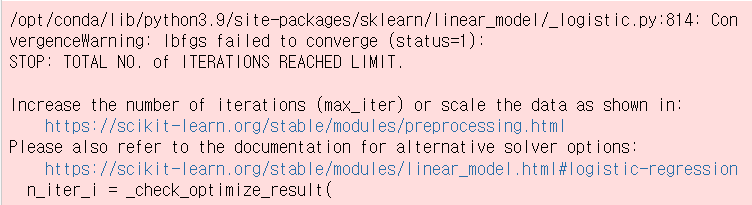

로지스틱회귀에서 위와 같은 메시지가 발생하였음
max_iter를 올려줬지만 그럼에도 불구하고 발생하는걸로 보아
자료의 표준화가 필요해보여서 하는 시도

평가 성능지표로는 f1-score를 선택했다. 숫자데이터가 골고루 분포하며 데이터의 특성또한 골고루 분포되어있다
따라서 데이터의 편향이 없을 것으로 판단되며 f1-score가 높을수록 유리할 것으로 보인다
로지스틱회귀는 스케일링된 데이터에서 나은 성능을 보여주긴 하지만
손글씨 부분에선 서포트 벡터머신이 압도적으로 나오는 것을 알 수 있음
다른 알고리즘들도 스케일링을 적용하면 정확도가 어떻게 바뀔지 궁금함